In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("income_kmeans.xlsx")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


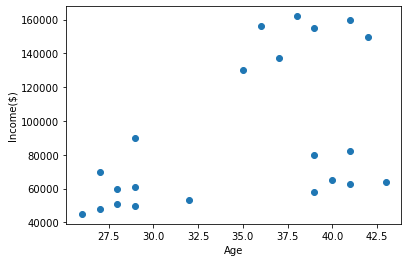

In [3]:
plt.scatter(df["Age"],df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(df[["Age","Income($)"]])
predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [8]:
df["Predicted"] = predicted
df.head()

,Name,Age,Income($),Predicted
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [9]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

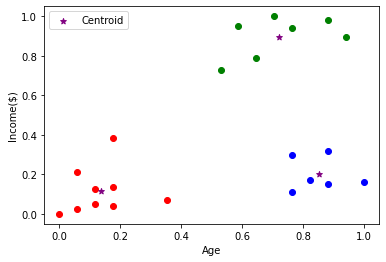

In [10]:
df0 = df[df["Predicted"]==0]
df1 = df[df["Predicted"]==1]
df2 = df[df["Predicted"]==2]

plt.scatter(df0["Age"],df0["Income($)"],color = "green")
plt.scatter(df1["Age"],df1["Income($)"],color = "red")
plt.scatter(df2["Age"],df2["Income($)"],color = "blue")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "purple",marker = "*", label="Centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

### Elbow Plot

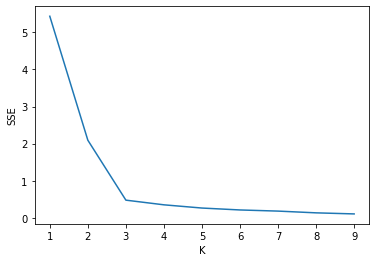

In [12]:
sse = []
km_range = range(1,10)
for k in km_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[["Age","Income($)"]])
    sse.append(km.inertia_)

plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(km_range,sse)